In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load data
df = pd.read_csv(r"D:\AI\project\main model\time_series_dataset24.csv")
df

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823995,0.002673,0.001582,0.004092,0.003841,0.007138,0.006577,0.006932,0.021125,-0.006264,6.318599,...,1.142187,5.881754,6.534067,4.384009,0.244296,0.208429,0.197766,FL,9,24
13823996,0.002672,0.001587,0.004089,0.003838,0.007111,0.006554,0.006877,0.022708,-0.005751,6.314329,...,1.134304,5.889965,6.556730,4.383941,0.122864,0.210258,0.222160,FL,9,24
13823997,0.002671,0.001589,0.004089,0.003834,0.007081,0.006527,0.006842,0.027942,-0.002138,6.316629,...,1.127078,5.876498,6.520928,4.383734,0.261382,0.145623,0.202035,FL,9,24
13823998,0.002670,0.001585,0.004087,0.003829,0.007069,0.006505,0.006827,0.026696,-0.002301,6.320242,...,1.135289,5.878797,6.571511,4.383563,0.193038,0.041963,0.208134,FL,9,24


In [5]:
df = df.drop(['PIN1', 'PTC', 'WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','FricTorque','Pin','Pdiff','GV','AGV','Group','PDT2','PGV1','PGV3','PDT4'], axis=1)
print(df)

              PDT1      PGV2      PDT3      ATB1      ATB2  Stage
0         0.004675  0.005931  0.020413 -0.163528  0.224599      1
1         0.004674  0.005950  0.020705 -0.051941  0.307536      1
2         0.004673  0.005949  0.021536 -0.024502  0.252041      1
3         0.004673  0.005971  0.021012 -0.042185  0.274605      1
4         0.004673  0.005995  0.019912 -0.048283  0.203255      1
...            ...       ...       ...       ...       ...    ...
13823995  0.004092  0.006577  0.021125  0.208429  0.197766      9
13823996  0.004089  0.006554  0.022708  0.210258  0.222160      9
13823997  0.004089  0.006527  0.027942  0.145623  0.202035      9
13823998  0.004087  0.006505  0.026696  0.041963  0.208134      9
13823999  0.004087  0.006499  0.024260  0.105378  0.202035      9

[13824000 rows x 6 columns]


In [7]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [9]:
import numpy as np

# --- Load Full Dataset ---
features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']
X = df[features].values
y = df['Stage'].values

# --- Normalization ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# --- Shift Labels to 0-based ---
y = y - 1

# --- Time Series Windowing ---
window_size = 30
stride = 5

X_windows = []
y_windows = []

for i in range(0, len(X_scaled) - window_size, stride):
    X_windows.append(X_scaled[i:i + window_size])
    y_windows.append(y[i + window_size - 1])

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

print("\n✅ After windowing → Found stages and counts:")
unique, counts = np.unique(y_windows, return_counts=True)
for stage, count in zip(unique + 1, counts):
    print(f"Stage {stage}: {count} samples")

# --- ✅ Subsample (Optional) Only if ALL 9 stages are present ---
if len(unique) < 9:
    print("\n⚠️ Not all stages present. Skipping subsampling to preserve rare classes.")
else:
    print("\n✅ All stages present. Subsampling dataset to reduce size.")
    X_windows, _, y_windows, _ = train_test_split(
        X_windows, y_windows,
        test_size=0.4,
        random_state=42,
        stratify=y_windows
    )

# --- Train/Test Split (Stratify to balance stages) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_windows, y_windows,
    test_size=0.2,
    random_state=42,
    stratify=y_windows
)

# --- Final Stage Counts in Train/Test ---
print("\n✅ Final train/test stage distribution:")
train_stages, train_counts = np.unique(y_train, return_counts=True)
test_stages, test_counts = np.unique(y_test, return_counts=True)

for stage, train_c, test_c in zip(train_stages + 1, train_counts, test_counts):
    print(f"Stage {stage}: Train = {train_c}, Test = {test_c}")

# --- Output Final Shapes ---
print("\n✅ Final dataset shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



✅ After windowing → Found stages and counts:
Stage 1: 307195 samples
Stage 2: 307200 samples
Stage 3: 307200 samples
Stage 4: 307200 samples
Stage 5: 307200 samples
Stage 6: 307200 samples
Stage 7: 307200 samples
Stage 8: 307200 samples
Stage 9: 307199 samples

✅ All stages present. Subsampling dataset to reduce size.

✅ Final train/test stage distribution:
Stage 1: Train = 147453, Test = 36864
Stage 2: Train = 147456, Test = 36864
Stage 3: Train = 147456, Test = 36864
Stage 4: Train = 147456, Test = 36864
Stage 5: Train = 147456, Test = 36864
Stage 6: Train = 147456, Test = 36864
Stage 7: Train = 147456, Test = 36864
Stage 8: Train = 147456, Test = 36864
Stage 9: Train = 147455, Test = 36864

✅ Final dataset shapes:
X_train shape: (1327100, 30, 5)
X_test shape: (331776, 30, 5)
y_train shape: (1327100,)
y_test shape: (331776,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
model = Sequential([
    # 1st Convolutional Block
    layers.Conv1D(32, kernel_size=5, activation='tanh', padding='same', input_shape=(30, 5)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
   
    # 2nd Convolutional Block
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    # Output Layer
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 15, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          14,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,089 (86.29 KB)

 Trainable params: 21,897 (85.54 KB)

 Non-trainable params: 192 (768.00 B)

In [15]:
# Learning rate reduction + early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=40, # Increased epochs
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr] # Added callbacks
)

Epoch 1/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 502s 24ms/step - accuracy: 0.4787 - loss: 1.3427 - val_accuracy: 0.6585 - val_loss: 0.8878 - learning_rate: 0.0010
Epoch 2/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 499s 24ms/step - accuracy: 0.6339 - loss: 0.9463 - val_accuracy: 0.6840 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 3/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 497s 24ms/step - accuracy: 0.6601 - loss: 0.8779 - val_accuracy: 0.7019 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 4/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 543s 26ms/step - accuracy: 0.6731 - loss: 0.8409 - val_accuracy: 0.7053 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 5/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 456s 22ms/step - accuracy: 0.6823 - loss: 0.8182 - val_accuracy: 0.7200 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 6/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - accuracy: 0.6890 - loss: 0.8011 - val_accuracy: 0.7199 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 7/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 137

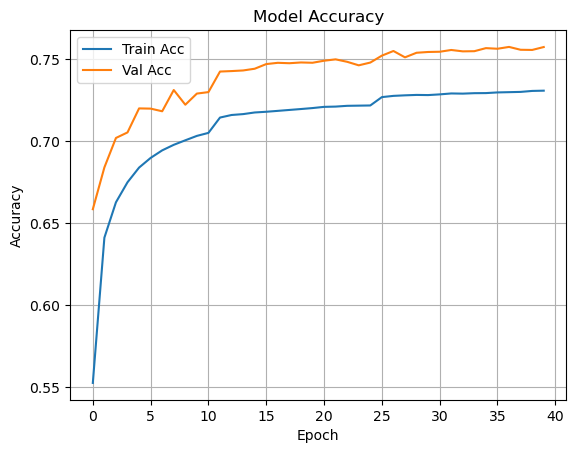

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


10368/10368 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


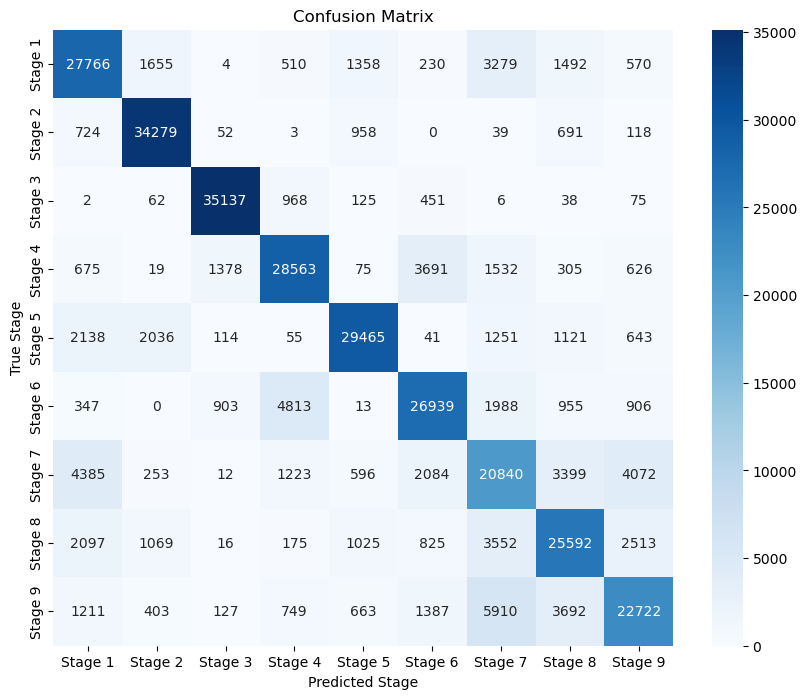

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Run predictions on your test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize it as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 10)],
            yticklabels=[f'Stage {i}' for i in range(1, 10)])
plt.xlabel('Predicted Stage')
plt.ylabel('True Stage')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=[f'Stage {i}' for i in range(1, 10)]))


              precision    recall  f1-score   support

     Stage 1       0.71      0.75      0.73     36864
     Stage 2       0.86      0.93      0.89     36864
     Stage 3       0.93      0.95      0.94     36864
     Stage 4       0.77      0.77      0.77     36864
     Stage 5       0.86      0.80      0.83     36864
     Stage 6       0.76      0.73      0.74     36864
     Stage 7       0.54      0.57      0.55     36864
     Stage 8       0.69      0.69      0.69     36864
     Stage 9       0.70      0.62      0.66     36864

    accuracy                           0.76    331776
   macro avg       0.76      0.76      0.76    331776
weighted avg       0.76      0.76      0.76    331776



In [24]:
# Save model in HDF5 format
model.save("cnn_fault_model.h5")
